In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(4250, 20)

In [5]:
data_types = df.dtypes

print(data_types)

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object


In [6]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
missing_values_count = df.isna().sum()  # or df.isnull().sum()
print(missing_values_count)

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [8]:
columns_to_delete = ['state', 'area_code']  # List of column names to delete
df = df.drop(columns=columns_to_delete)

# Display the DataFrame after deleting columns
print("\nAfter deleting columns:")
print(df)


After deleting columns:
      account_length international_plan voice_mail_plan  \
0                107                 no             yes   
1                137                 no              no   
2                 84                yes              no   
3                 75                yes              no   
4                121                 no             yes   
...              ...                ...             ...   
4245              83                 no              no   
4246              73                 no              no   
4247              75                 no              no   
4248              50                 no             yes   
4249              86                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71  

In [9]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [10]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['international_plan'] = df['international_plan'].map(binary_mapping).fillna(0).astype(int)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,0,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,0,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,0,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [11]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['voice_mail_plan'] = df['voice_mail_plan'].map(binary_mapping).fillna(0).astype(int)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,0,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,0,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [12]:
binary_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the column
df['churn'] = df['churn'].map(binary_mapping).fillna(0).astype(int)
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,0,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,0,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [13]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,0,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,0,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,0,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [14]:
data_types = df.dtypes

print(data_types)

account_length                     int64
international_plan                 int32
voice_mail_plan                    int32
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int32
dtype: object


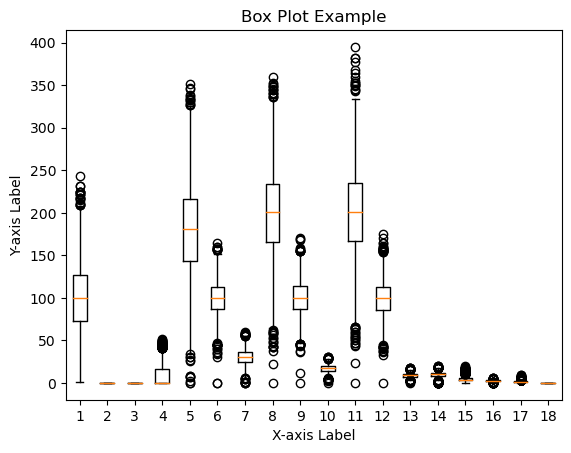

In [19]:
# Create a box plot
plt.boxplot(df)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()





In [16]:
import numpy as np

# Define a function to identify and remove outliers
def remove_outliers(df, threshold=1.5):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    return df[(df >= lower_bound) & (df <= upper_bound)]


# Remove outliers
cleaned_data = remove_outliers(df)

print("Original Data:", df)
print("Cleaned Data:", cleaned_data)


Original Data:       account_length  international_plan  voice_mail_plan  \
0                107                   0                0   
1                137                   0                0   
2                 84                   0                0   
3                 75                   0                0   
4                121                   0                0   
...              ...                 ...              ...   
4245              83                   0                0   
4246              73                   0                0   
4247              75                   0                0   
4248              50                   0                0   
4249              86                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4     

In [17]:
cleaned_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,0,0,0,NaN,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,0,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,0,24,218.2,88,37.09,NaN,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


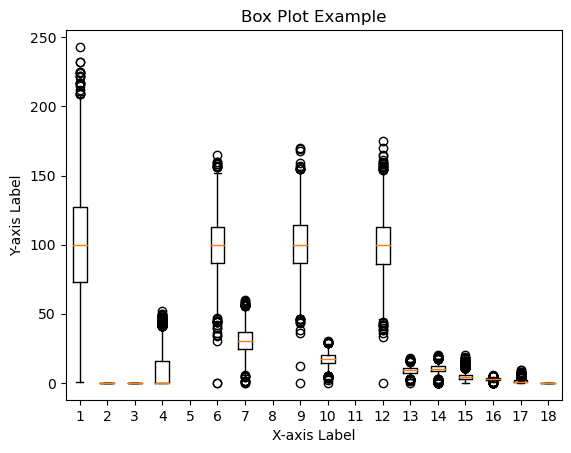

In [18]:
# Create a box plot
plt.boxplot(cleaned_data)

# Add title and labels
plt.title('Box Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

In [110]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Select the columns you want to standardize (numeric columns)
# For example, if you want to standardize columns 'A' and 'B':
columns_to_standardize = ['account_length', 'international_plan','total_day_minutes','total_day_calls']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])




In [111]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.170399,0.0,0,26,-0.345510,1.163449,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0.926186,0.0,0,0,1.169136,0.710014,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,-0.409038,0.0,0,0,2.206058,-1.456398,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,-0.635774,0.0,0,0,-0.251076,0.659633,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0.523099,0.0,0,24,0.702522,-0.599910,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [112]:

categorical_columns = ['number_vmail_messages']

# Apply one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_columns)



In [113]:
data_encoded.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,number_vmail_messages_42,number_vmail_messages_43,number_vmail_messages_44,number_vmail_messages_45,number_vmail_messages_46,number_vmail_messages_47,number_vmail_messages_48,number_vmail_messages_49,number_vmail_messages_50,number_vmail_messages_52
0,0.170399,0.0,0,-0.345510,1.163449,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
1,0.926186,0.0,0,1.169136,0.710014,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
2,-0.409038,0.0,0,2.206058,-1.456398,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
3,-0.635774,0.0,0,-0.251076,0.659633,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0
4,0.523099,0.0,0,0.702522,-0.599910,37.09,348.5,108,29.62,212.6,...,0,0,0,0,0,0,0,0,0,0
